# **WATERMELON FRUIT AND LEAF DISEASE PREDICTION USING VGG16**
##   **TEAM-A17**

* Soukhya Madan Nayak
* Sharanamma Katti
* Abhishek Angadi
* Prem V








In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


For 30 epochs

Found 4970 images belonging to 4 classes.
Found 865 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 1426s 9s/step - accuracy: 0.4909 - loss: 1.3862 - val_accuracy: 0.7896 - val_loss: 0.7388 - learning_rate: 5.0000e-04
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 119s 500ms/step - accuracy: 0.7730 - loss: 0.7527 - val_accuracy: 0.8913 - val_loss: 0.5164 - learning_rate: 5.0000e-04
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 509ms/step - accuracy: 0.8396 - loss: 0.5949 - val_accuracy: 0.9087 - val_loss: 0.4351 - learning_rate: 5.0000e-04
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 84s 515ms/step - accuracy: 0.8627 - loss: 0.5028 - val_accuracy: 0.9318 - val_loss: 0.3666 - learning_rate: 5.0000e-04
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 141s 502ms/step - accuracy: 0.8916 - loss: 0.4400 - val_accuracy: 0.9399 - val_loss: 0.3229 - learning_rate: 5.0000e-04
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 510ms/step - accuracy: 0.8913 - loss: 0.4204 - val_accuracy: 0.9364 - val_loss: 0.3117 - learning_rate: 5.0000e-04
Epoch 7/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 82s 509ms/step -

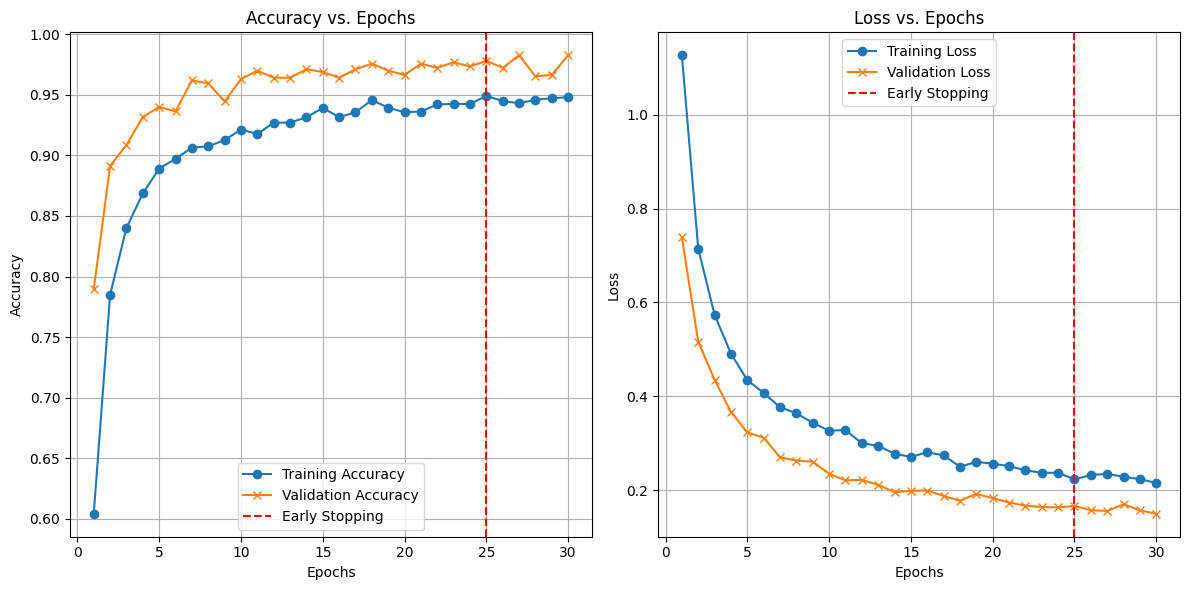

Found 1165 images belonging to 4 classes.
37/37 ━━━━━━━━━━━━━━━━━━━━ 330s 9s/step - accuracy: 0.9933 - loss: 0.1175
Test accuracy: 0.9879828095436096
156/156 ━━━━━━━━━━━━━━━━━━━━ 79s 505ms/step - accuracy: 0.9675 - loss: 0.1817
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9819 - loss: 0.1526
Train accuracy: 0.9672031998634338
Validation accuracy: 0.9826589822769165


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

# Set constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4  # Change according to your dataset
EPOCHS = 30

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
train_generator = train_datagen.flow_from_directory(
   '/content/drive/MyDrive/Training_set',  # Replace with actual path to your dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Validation_set',  # Replace with actual path to your dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load the VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for early stopping, learning rate reduction, and saving the model
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Save the model after each epoch
checkpoint = ModelCheckpoint(
    'model_epoch_{epoch:02d}.keras',  # Save the model after each epoch with the epoch number
    monitor='val_loss',
    save_best_only=False,  # You can set this to True to save only the best model
    mode='min',  # Save the model with the minimum validation loss
    save_freq='epoch'  # Save after each epoch
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the final model
model.save('watermelon_disease_classifier_final989.keras')

# Plot Accuracy vs. Epochs
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='x')
plt.axvline(x=len(train_acc) - early_stopping.patience, color='red', linestyle='--', label='Early Stopping')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='x')
plt.axvline(x=len(train_loss) - early_stopping.patience, color='red', linestyle='--', label='Early Stopping')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
# Assuming you have a separate test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Testing_Set',  # Replace with actual path to your dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Calculate train and validation accuracies
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)

print(f'Train accuracy: {train_acc}')
print(f'Validation accuracy: {val_acc}')


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step


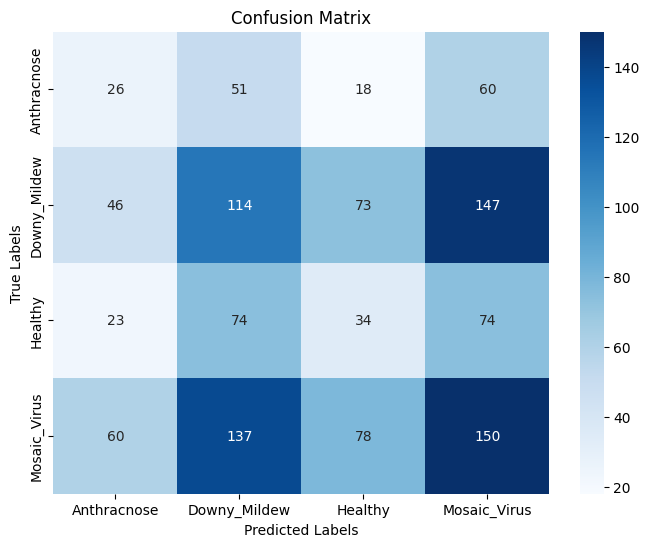

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true labels and predictions
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)
test_predictions = np.argmax(test_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Load the saved model
model = tf.keras.models.load_model('watermelon_disease_classifier_final989.keras')

# Load the test dataset (same as before)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Testing_Set',  # Replace with actual path to your dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency with confusion matrix
)

# Get true labels and model predictions
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)
test_predictions = np.argmax(test_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Generate classification report
report = classification_report(test_labels, test_predictions, target_names=test_generator.class_indices.keys(), output_dict=True)

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")

# Convert classification report to DataFrame for better formatting
report_df = pd.DataFrame(report).T  # Transpose for better readability

# Display the report as a table
print(report_df)

# Optionally, you can also export this to a CSV file if needed
# report_df.to_csv('classification_report.csv', index=True)


Found 1165 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step
Accuracy: 0.9880

Classification Report:
              precision    recall  f1-score      support
Anthracnose    1.000000  1.000000  1.000000   155.000000
Downy_Mildew   0.992021  0.981579  0.986772   380.000000
Healthy        0.995074  0.985366  0.990196   205.000000
Mosaic_Virus   0.976798  0.990588  0.983645   425.000000
accuracy       0.987983  0.987983  0.987983     0.987983
macro avg      0.990973  0.989383  0.990153  1165.000000
weighted avg   0.988066  0.987983  0.987994  1165.000000


Found 1165 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step


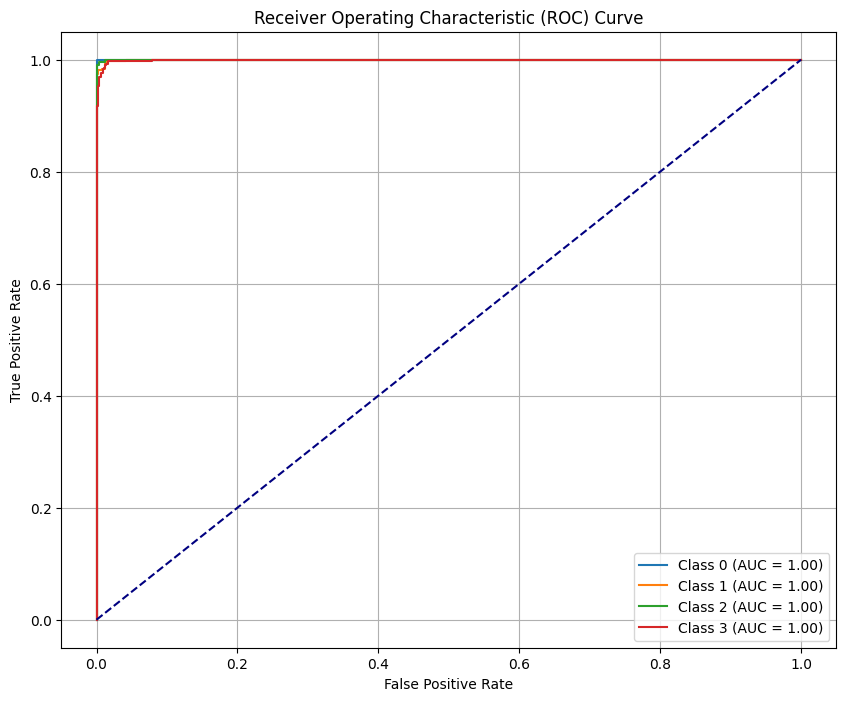

Mean AUC: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = load_model('watermelon_disease_classifier_final989.keras')

# Load the test dataset (same as before)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Testing_Set',  # Replace with actual path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for ROC curve
)

# Get the true labels and predicted probabilities
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)

# Binarize the labels for multi-class ROC curve
lb = LabelBinarizer()
test_labels_bin = lb.fit_transform(test_labels)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(lb.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, calculate the macro-average AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f"Mean AUC: {mean_auc:.2f}")


For 50 epochs

Epoch 31/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 526ms/step - accuracy: 0.9440 - loss: 0.2215 - val_accuracy: 0.9803 - val_loss: 0.1611 - learning_rate: 5.0000e-04
Epoch 32/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 505ms/step - accuracy: 0.9508 - loss: 0.2103 - val_accuracy: 0.9815 - val_loss: 0.1412 - learning_rate: 5.0000e-04
Epoch 33/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 510ms/step - accuracy: 0.9535 - loss: 0.2091 - val_accuracy: 0.9723 - val_loss: 0.1489 - learning_rate: 5.0000e-04
Epoch 34/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 141s 509ms/step - accuracy: 0.9511 - loss: 0.2043 - val_accuracy: 0.9792 - val_loss: 0.1443 - learning_rate: 5.0000e-04
Epoch 35/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 142s 504ms/step - accuracy: 0.9529 - loss: 0.2029 - val_accuracy: 0.9757 - val_loss: 0.1408 - learning_rate: 5.0000e-04
Epoch 36/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 89s 548ms/step - accuracy: 0.9532 - loss: 0.1966 - val_accuracy: 0.9792 - val_loss: 0.1500 - learning_rate: 5.0000e-04
Epoch 37/50
156/156 ━━━━━━━━━━━━━━━━━━

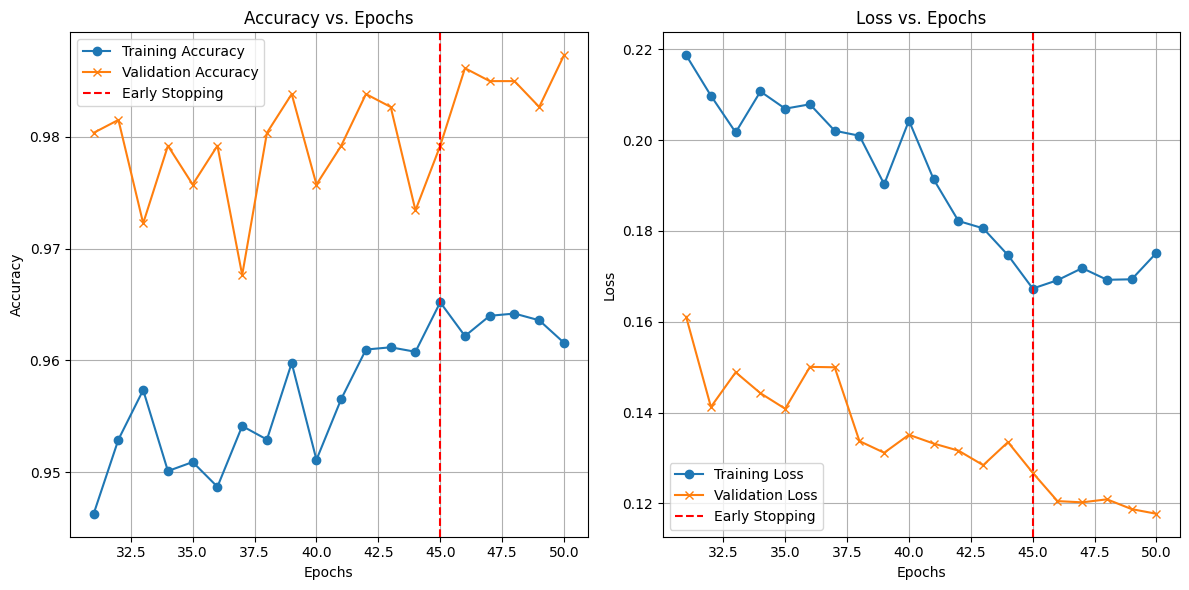

In [ ]:
# Load the model saved after epoch 30
model = tf.keras.models.load_model('model_epoch_30.keras')

# Continue training from epoch 30 to epoch 50
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    initial_epoch=30,  # Start from epoch 30
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the updated model after training
model.save('watermelon_disease_classifier_final_epoch_50.keras')

# Plot the updated accuracy and loss graphs
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(31, 51)  # Update the epoch range to reflect the new training period

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='x')
plt.axvline(x=50 - early_stopping.patience, color='red', linestyle='--', label='Early Stopping')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='x')
plt.axvline(x=50 - early_stopping.patience, color='red', linestyle='--', label='Early Stopping')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 1165 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step


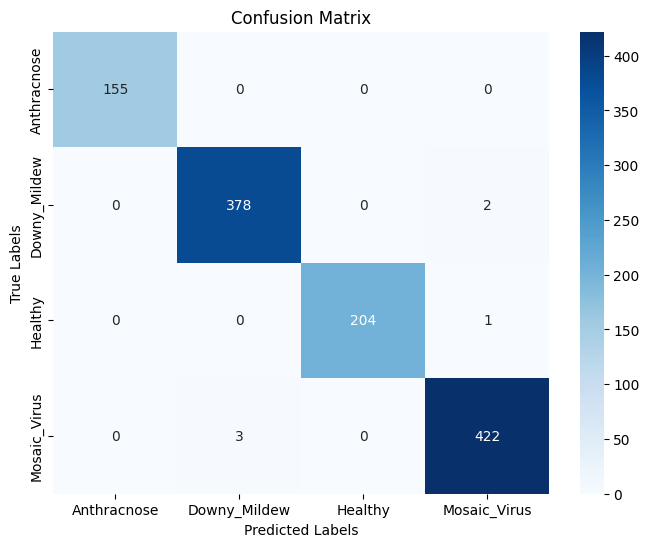

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('watermelon_disease_classifier_final_epoch_50.keras')

# Load the test dataset (same as before)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Testing_Set',  # Replace with the actual path to your test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important to not shuffle for confusion matrix
)

# Get true labels and model predictions
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)
test_predictions = np.argmax(test_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Load the saved model
model = tf.keras.models.load_model('watermelon_disease_classifier_final_epoch_50.keras')

# Load the test dataset (same as before)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Testing_Set',  # Replace with actual path to your dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency with confusion matrix
)

# Get true labels and model predictions
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)
test_predictions = np.argmax(test_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Generate classification report
report = classification_report(test_labels, test_predictions, target_names=test_generator.class_indices.keys(), output_dict=True)

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")

# Convert classification report to DataFrame for better formatting
report_df = pd.DataFrame(report).T  # Transpose for better readability

# Display the report as a table
print(report_df)

# Optionally, you can also export this to a CSV file if needed
# report_df.to_csv('classification_report.csv', index=True)


Found 1165 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step
Accuracy: 0.9948

Classification Report:
              precision    recall  f1-score     support
Anthracnose    1.000000  1.000000  1.000000   155.00000
Downy_Mildew   0.992126  0.994737  0.993430   380.00000
Healthy        1.000000  0.995122  0.997555   205.00000
Mosaic_Virus   0.992941  0.992941  0.992941   425.00000
accuracy       0.994850  0.994850  0.994850     0.99485
macro avg      0.996267  0.995700  0.995981  1165.00000
weighted avg   0.994857  0.994850  0.994852  1165.00000


Found 1165 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step


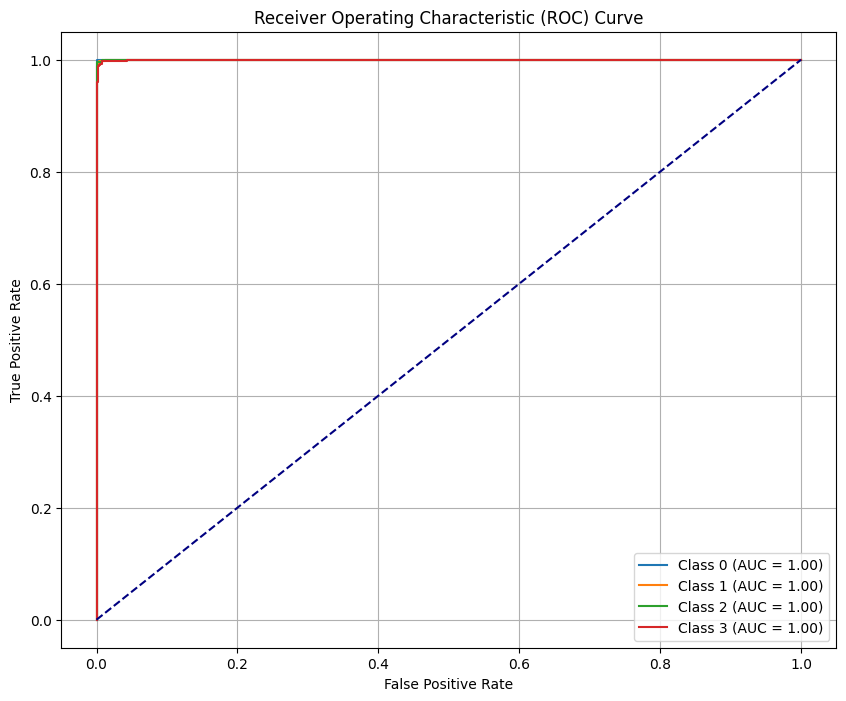

Mean AUC: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = load_model('watermelon_disease_classifier_final_epoch_50.keras')

# Load the test dataset (same as before)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Testing_Set',  # Replace with actual path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for ROC curve
)

# Get the true labels and predicted probabilities
test_labels = test_generator.classes
test_pred_probs = model.predict(test_generator)

# Binarize the labels for multi-class ROC curve
lb = LabelBinarizer()
test_labels_bin = lb.fit_transform(test_labels)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(lb.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, calculate the macro-average AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f"Mean AUC: {mean_auc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: Anthracnose


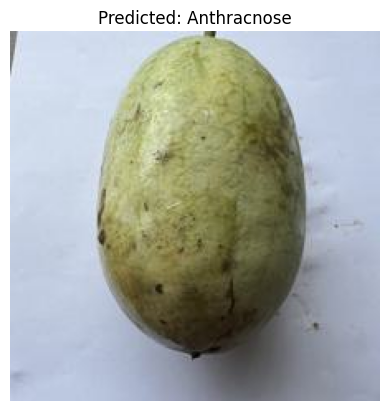

In [ ]:
# Manually define the class labels as you did during training
class_labels = ['Anthracnose', 'Downy Mildew','Healthy', 'Mosaic Virus']  # Update with your actual class labels

# Path to the input image (replace with your image path)
input_image_path = '/content/drive/MyDrive/Testing_Set/Anthracnose/IMG_4069.jpg'  # Update this with the correct image path

# Load and preprocess the image
img = image.load_img(input_image_path, target_size=(224, 224))  # Resize to model's expected input size
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image (same preprocessing used during training)

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class label
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# Optionally, display the input image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Downy Mildew


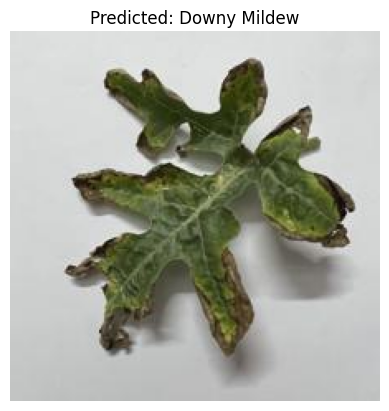

In [ ]:
# Manually define the class labels as you did during training
class_labels = ['Anthracnose', 'Downy Mildew','Healthy', 'Mosaic Virus']  # Update with your actual class labels

# Path to the input image (replace with your image path)
input_image_path = '/content/drive/MyDrive/Testing_Set/Downy_Mildew/IMG_2186.jpg'  # Update this with the correct image path

# Load and preprocess the image
img = image.load_img(input_image_path, target_size=(224, 224))  # Resize to model's expected input size
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image (same preprocessing used during training)

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class label
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# Optionally, display the input image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Class: Healthy


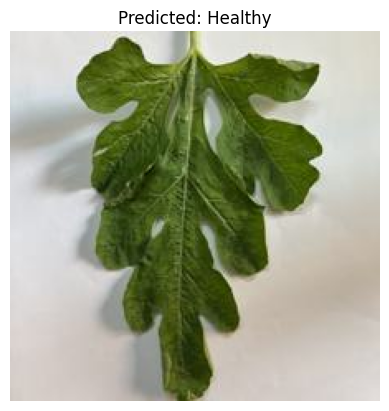

In [ ]:
# Manually define the class labels as you did during training
class_labels = ['Anthracnose', 'Downy Mildew','Healthy', 'Mosaic Virus']  # Update with your actual class labels

# Path to the input image (replace with your image path)
input_image_path = '/content/drive/MyDrive/Testing_Set/Healthy/IMG_2491.jpg'  # Update this with the correct image path

# Load and preprocess the image
img = image.load_img(input_image_path, target_size=(224, 224))  # Resize to model's expected input size
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image (same preprocessing used during training)

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class label
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# Optionally, display the input image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Mosaic Virus


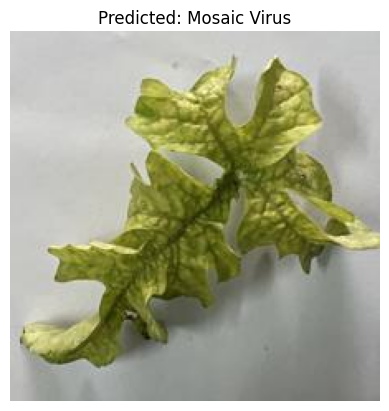

In [ ]:
# Manually define the class labels as you did during training
class_labels = ['Anthracnose', 'Downy Mildew','Healthy', 'Mosaic Virus']  # Update with your actual class labels

# Path to the input image (replace with your image path)
input_image_path = '/content/drive/MyDrive/Testing_Set/Mosaic_Virus/IMG_1923.jpg'  # Update this with the correct image path

# Load and preprocess the image
img = image.load_img(input_image_path, target_size=(224, 224))  # Resize to model's expected input size
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image (same preprocessing used during training)

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class label
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# Optionally, display the input image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
